In [1]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/HakkiKaanSimsek/Makine_Ogrenmesi_Dersleri/master/1.aciklayici_veri_analizi/data/adult.csv')
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
df.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 
              'relationship','race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 
              'native-country', 'salary']
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Salary Distribution:


 <=50K    24720
 >50K      7841
Name: salary, dtype: int64

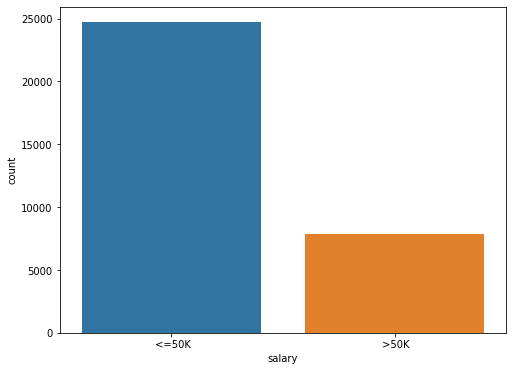

In [5]:
plt.figure(figsize=(8,6))
sns.countplot(df['salary'])
print('Salary Distribution:')
df['salary'].value_counts()

Maaşı 50K'dan düşük ve yüksek olanların yaş karakteristiğine bakalım şimdi de.

Adımlarımız sırasıyla şöyle:

Öncelikle df['salary'] sütunun <=50K'ya eşit olduklarını seçiyoruz.
Bu şartı sağlayan kayıtların ['age'] sütununa bakıyoruz.
describe() fonksiyonuyla bu şartı sağlayan kayıtların ['age'] sütunuyla ilgili dağılımnı elde ediyoruz.
Aynı işlemleri df['salary'] sütunun >50K'ya eşit olduğu sütunlar için de tekrarlıyoruz.

In [10]:
print("Maaşı 50K'dan düşük olanların yaş karakteristiği: ")
print(df[df['salary'] == ' <=50K'].age.describe())
print('')
print("Maaşı 50K'dan yüksek olanların yaş karakteristiği : ")
print(df[df['salary']== ' >50K'].age.describe())

Maaşı 50K'dan düşük olanların yaş karakteristiği: 
count    24720.000000
mean        36.783738
std         14.020088
min         17.000000
25%         25.000000
50%         34.000000
75%         46.000000
max         90.000000
Name: age, dtype: float64

Maaşı 50K'dan yüksek olanların yaş karakteristiği : 
count    7841.000000
mean       44.249841
std        10.519028
min        19.000000
25%        36.000000
50%        44.000000
75%        51.000000
max        90.000000
Name: age, dtype: float64


 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

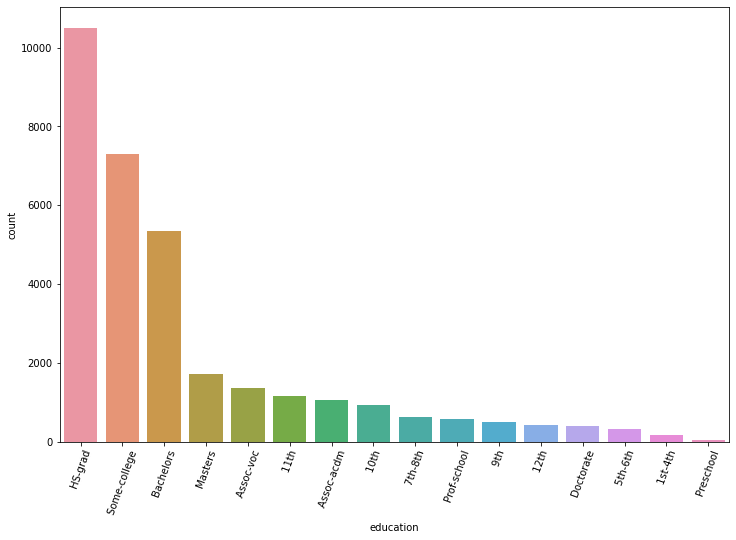

In [15]:
plt.figure(figsize=(12,8))
sns.countplot(df['education'], order = df['education'].value_counts().index)
plt.xticks(rotation=70)
df['education'].value_counts()

In [16]:
df.groupby('education')['age'].describe()

,count,mean,std,min,25%,50%,75%,max
education,,,,,,,,
10th,933.0,37.429796,16.720713,17.0,22.00,34.0,52.0,90.0
11th,1175.0,32.355745,15.545485,17.0,18.00,28.0,43.0,90.0
12th,433.0,32.000000,14.334625,17.0,19.00,28.0,41.0,79.0
1st-4th,168.0,46.142857,15.615625,19.0,33.00,46.0,57.0,90.0
5th-6th,333.0,42.885886,15.557285,17.0,29.00,42.0,54.0,84.0
7th-8th,646.0,48.445820,16.092350,17.0,34.25,50.0,61.0,90.0
9th,514.0,41.060311,15.946862,17.0,28.00,39.0,54.0,90.0
Assoc-acdm,1067.0,37.381443,11.095177,19.0,29.00,36.0,44.0,90.0
Assoc-voc,1382.0,38.553546,11.631300,19.0,30.00,37.0,46.0,84.0


In [17]:
df.groupby('salary')['age'].describe()

,count,mean,std,min,25%,50%,75%,max
salary,,,,,,,,
<=50K,24720.0,36.783738,14.020088,17.0,25.0,34.0,46.0,90.0
>50K,7841.0,44.249841,10.519028,19.0,36.0,44.0,51.0,90.0


plt.figure() ile görselin enini ve boyunu belirliyoruz.
sns.barplot() fonksiyonuna görselleştirmek istediğimiz değişkenin x ve y değerlerini yazıyoruz.
hue='salary' seçeneği ile veriyi 'salary' sütununa göre ikiye ayırıyoruz.
default renk seçeneği yerine palette='inferno' ile görselleştiriyoruz.
x eksenini 70 derece döndürüyoruz ki değerler birbirine karışmasın.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

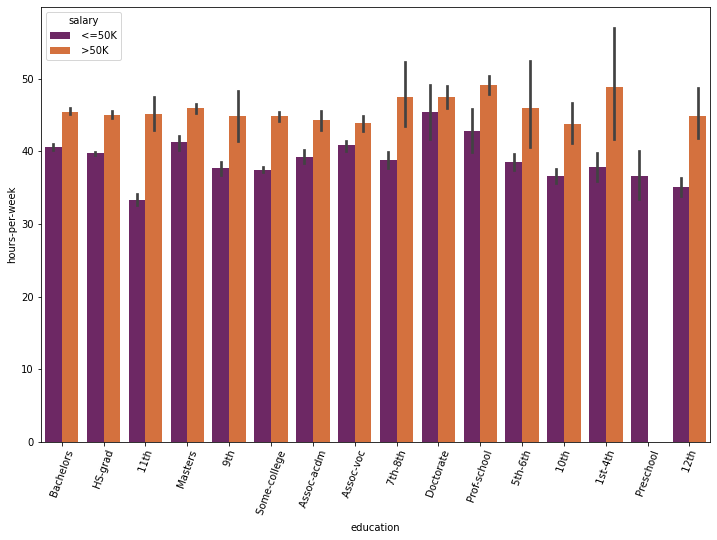

In [19]:
plt.figure(figsize=(12,8))
sns.barplot(x='education',y='hours-per-week', data = df, hue='salary', palette='inferno')
plt.xticks(rotation=70)


Şimdi de verimizi cinsiyete göre gruplayıp insanların haftalık ortalama çalışma saatlerini inceleyeceğiz.

Adımlarımız sırasıyla şöyle:

plt.figure() ile görselin enini ve boyunu belirliyoruz.
sns.pointplot() fonksiyonuna görselleştirmek istediğimiz değişkenin x ve y değerlerini yazıyoruz.
hue='sex' seçeneği ile veriyi sex' sütununa göre ikiye ayırıyoruz.
default renk seçeneği yerine palette='dark' ile görselleştiriyoruz.
x eksenini 70 derece döndürüyoruz ki değerler birbirine karışmasın.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

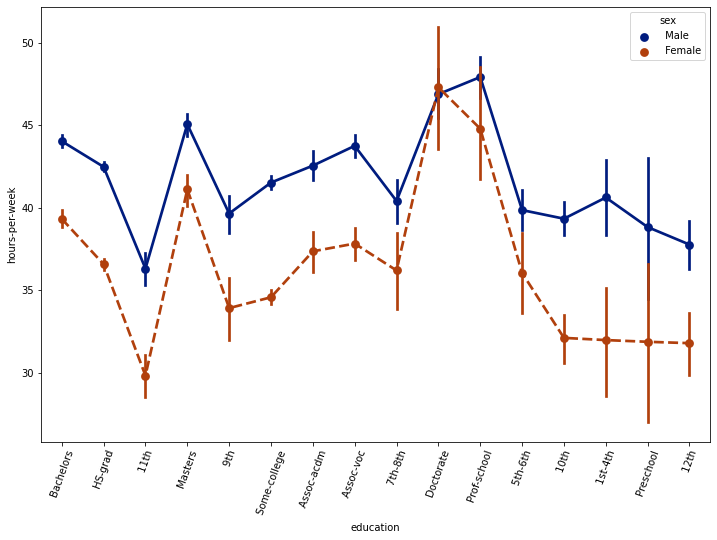

In [22]:
plt.figure(figsize=(12,8))
sns.pointplot(x="education", y="hours-per-week", hue='sex', palette="dark", linestyles=["-", "--"], data=df)
plt.xticks(rotation=70)

Son olarak yukarıdaki yaptığımız maaş ve cinsiyet gruplamalarını birleştiriyoruz ve buna göre insanların haftalık ortalama çalışma saatlerini inceliyoruz.

Adımlarımız sırasıyla şöyle:

plt.subplots() ile görselin enini, boyunu belirliyoruz ve satır, sütun sayısını belirliyoruz.
sns.pointplot() fonksiyonuna görselleştirmek istediğimiz değişkenin x ve y değerlerini yazıyoruz.
hue='sex' seçeneği ile veriyi 'sex' sütununa göre ikiye ayırıyoruz.
default renk seçeneği yerine palette='dark' ile görselleştiriyoruz.
data=df[df['salary']==' <=50K'] ile maaşı 50K'dan az olanları seçiyoruz.
ax=ax1 ile ilk figürün yerini belirliyoruz.
Aynı adımları maaşı 50K'dan fazla olanlar için tekrarlıyoruz.

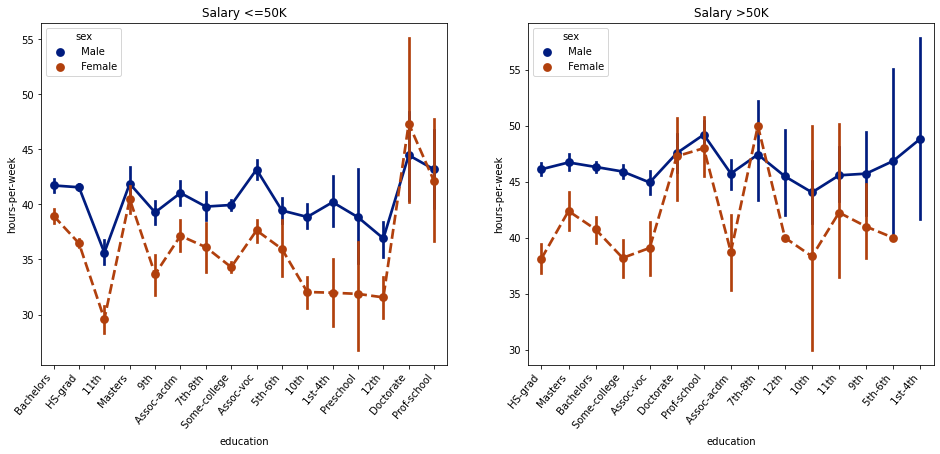

In [23]:
f, (ax1, ax2) =plt.subplots(1,2,figsize=(16,7))
sns.pointplot(x="education", y="hours-per-week", hue='sex', palette="dark", linestyles=["-", "--"], data=df[df['salary']==' <=50K'], ax=ax1)
ax1.set_title('Salary <=50K')
sns.pointplot(x="education", y="hours-per-week", hue='sex', palette="dark", linestyles=["-", "--"], data=df[df['salary']==' >50K'], ax=ax2)
ax2.set_title('Salary >50K')
f.autofmt_xdate(rotation=50)